In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Importing the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Giridhar88/Diabetes-prediction-using-svm/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

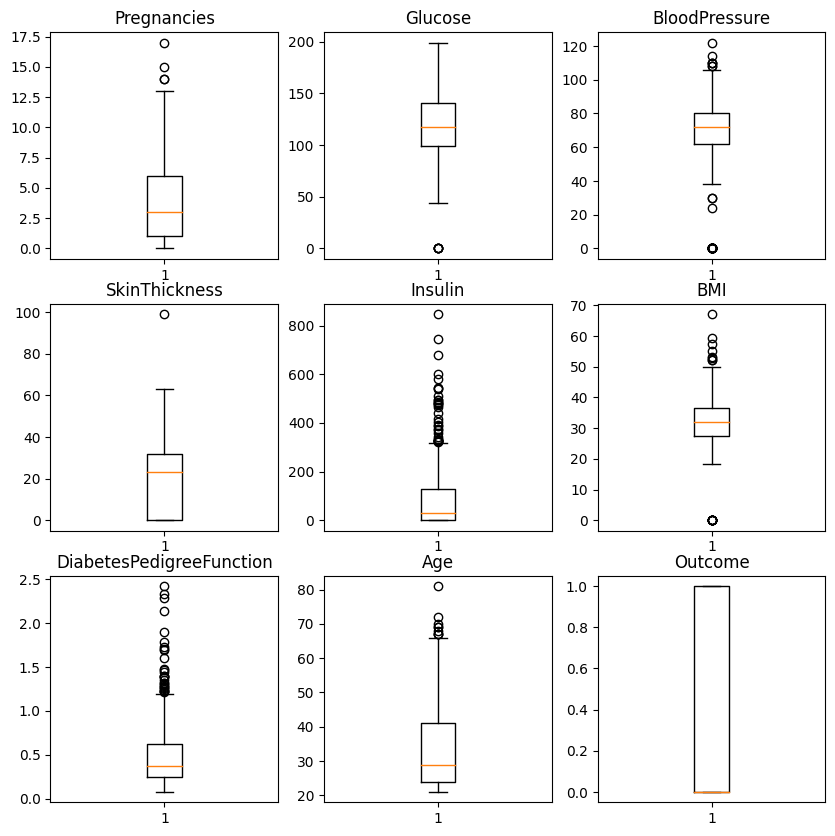

<Figure size 1000x600 with 0 Axes>

In [ ]:

l = [0,0,0,1,0,2,1,0,1,1,1,2,2,0,2,1,2,2]
c = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

def plot(x):

  fig, axes = plt.subplots(3,3,figsize=(10,10))
  plt.figure(figsize=(10,6))
  n,i = 0,0
  while i<=len(l):
    if i<len(l):
      axes[l[i],l[i+1]].boxplot(x[c[n]])
      axes[l[i],l[i+1]].set_title(c[n])
    n+=1
    i+=2
plot(df)


In [ ]:
df2 = df
df2.shape

(768, 9)

(725, 9)

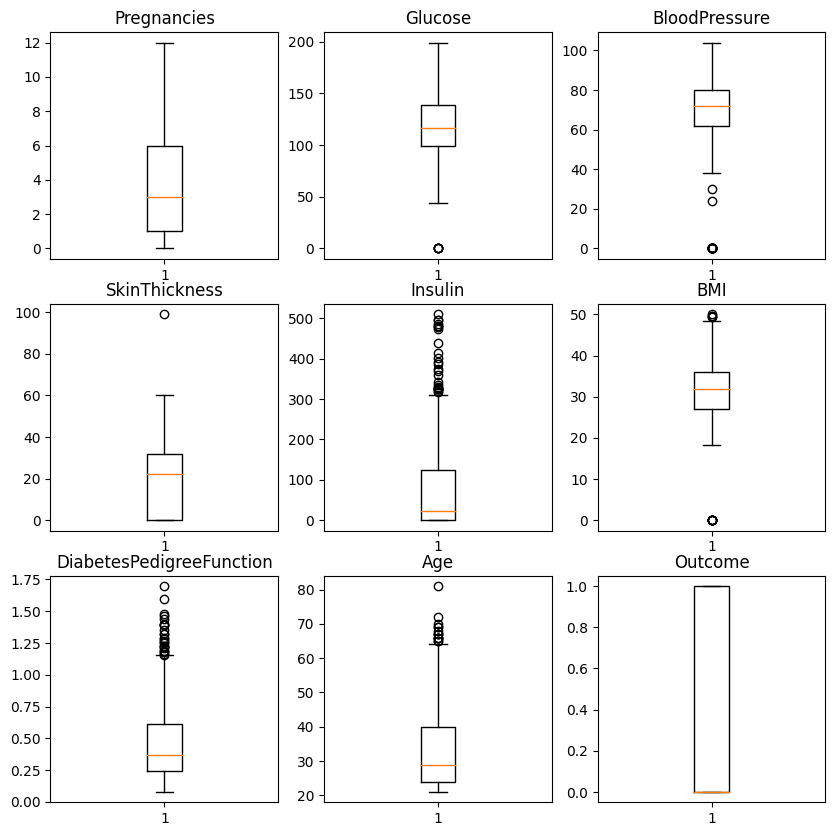

<Figure size 1000x600 with 0 Axes>

In [ ]:
limits = {}

for i in c:
  limits[i] = df2[i].quantile(0.99)
for i in limits:
  if i in ['Pregnancies','BloodPressure','Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    df2 = df2[df2[i]<limits[i]]
  df2.reset_index()
plot(df2)
df2.shape


In [ ]:
X = df2.drop(['Outcome'],axis = 1)
y = df2['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8137931034482758

In [ ]:
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7931034482758621

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8

In [ ]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.4827586206896552